In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from sklearn.preprocessing import StandardScaler

In [2]:
# Import CSV
full_df = pd.read_csv('medical_clean.csv')

In [3]:
# List columns
full_df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4',
       'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [4]:
# Reduce dataset to necessary columns related to research question
columns = ['Lat', 'Population', 'Area', 'Children', 'Age', 'Income', 'Marital', 'Gender', 'VitD_levels',
           'ReAdmis', 'Doc_visits', 'Full_meals_eaten', 'Soft_drink', 'HighBlood', 'Stroke', 
           'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 
           'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']
df = full_df[columns].copy()

# Check for null values

In [5]:
# Initial check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Lat                 10000 non-null  float64
 1   Population          10000 non-null  int64  
 2   Area                10000 non-null  object 
 3   Children            10000 non-null  int64  
 4   Age                 10000 non-null  int64  
 5   Income              10000 non-null  float64
 6   Marital             10000 non-null  object 
 7   Gender              10000 non-null  object 
 8   VitD_levels         10000 non-null  float64
 9   ReAdmis             10000 non-null  object 
 10  Doc_visits          10000 non-null  int64  
 11  Full_meals_eaten    10000 non-null  int64  
 12  Soft_drink          10000 non-null  object 
 13  HighBlood           10000 non-null  object 
 14  Stroke              10000 non-null  object 
 15  Complication_risk   10000 non-null  object 
 16  Overw

In [6]:
# Check for abnormal representations of null values. Also helps with checking for partial duplicates.
for col in columns:
    print(col)
    print(df[col].value_counts(dropna=False))
    print()
    print()

Lat
36.06702    4
33.34798    4
35.25512    4
39.38610    4
37.86890    4
           ..
41.00911    1
39.20560    1
46.36035    1
34.96563    1
40.49998    1
Name: Lat, Length: 8588, dtype: int64


Population
0        109
195       14
115       11
178       11
285       11
        ... 
8092       1
11147      1
27175      1
7371       1
41524      1
Name: Population, Length: 5951, dtype: int64


Area
Rural       3369
Suburban    3328
Urban       3303
Name: Area, dtype: int64


Children
0     2548
1     2509
3     1489
2     1475
4      995
7      213
8      209
6      191
5      169
9      108
10      94
Name: Children, dtype: int64


Age
47    161
52    159
74    159
41    157
86    156
     ... 
63    123
51    122
20    120
36    118
80    116
Name: Age, Length: 72, dtype: int64


Income
14572.40    2
20474.03    2
37132.97    2
29508.62    2
24997.02    2
           ..
41900.29    1
35093.92    1
44848.08    1
20815.96    1
62682.63    1
Name: Income, Length: 9993, dtype: int64


M

# Check for duplicates

In [7]:
# Check for complete duplicates
if df.duplicated().any():
    print('Has complete duplicates')
else:
    print('No complete duplicates')

No complete duplicates


# Check for outliers

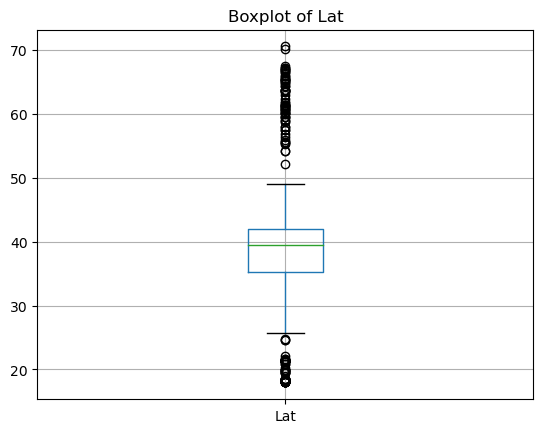

Lat has 150 outliers


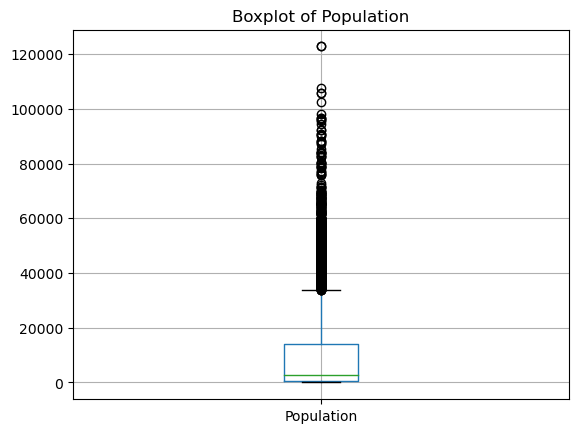

Population has 855 outliers

Value counts for Area
Rural       3369
Suburban    3328
Urban       3303
Name: Area, dtype: int64



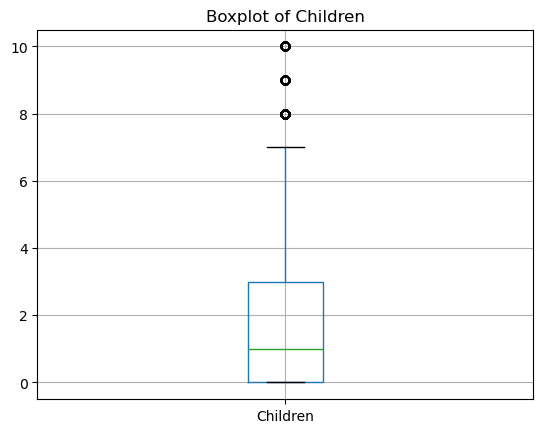

Children has 411 outliers


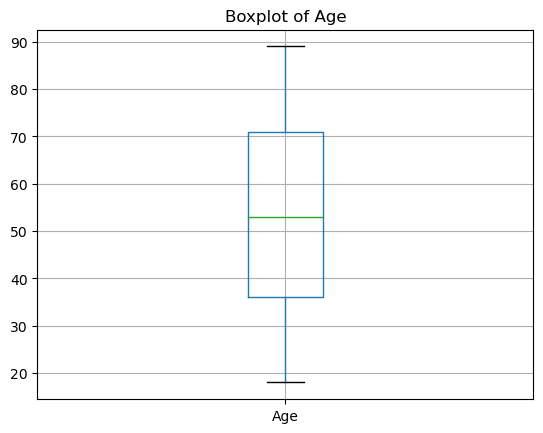

Age has 0 outliers


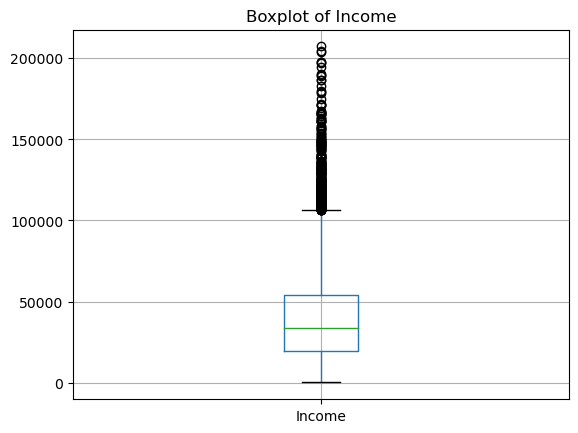

Income has 326 outliers

Value counts for Marital
Widowed          2045
Married          2023
Separated        1987
Never Married    1984
Divorced         1961
Name: Marital, dtype: int64


Value counts for Gender
Female       5018
Male         4768
Nonbinary     214
Name: Gender, dtype: int64



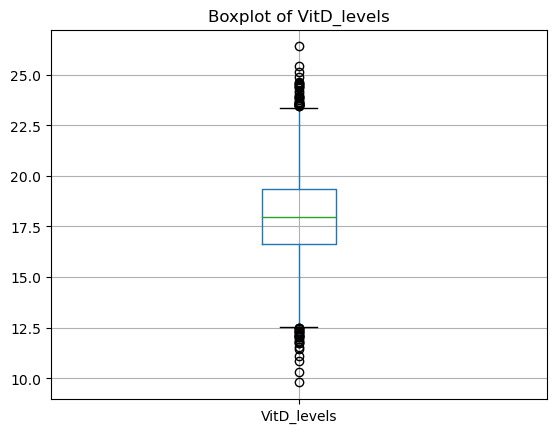

VitD_levels has 60 outliers

Value counts for ReAdmis
No     6331
Yes    3669
Name: ReAdmis, dtype: int64



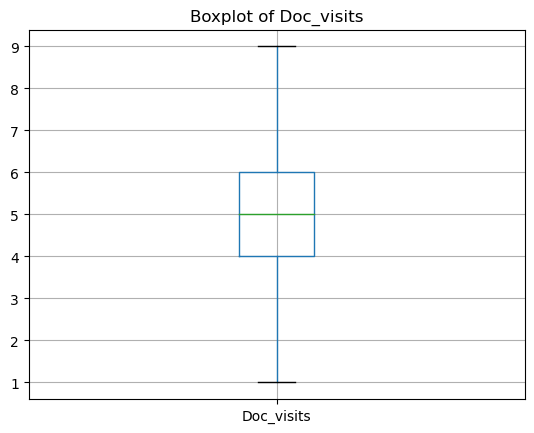

Doc_visits has 0 outliers


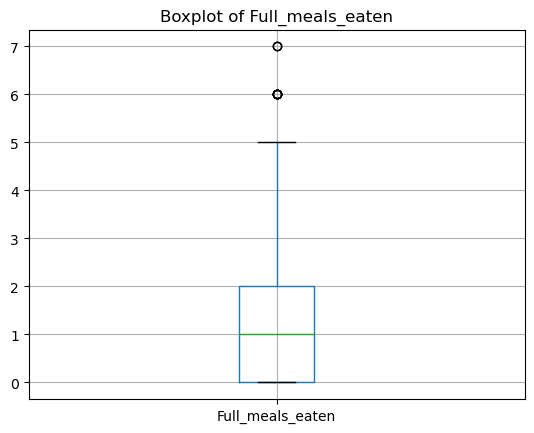

Full_meals_eaten has 8 outliers

Value counts for Soft_drink
No     7425
Yes    2575
Name: Soft_drink, dtype: int64


Value counts for HighBlood
No     5910
Yes    4090
Name: HighBlood, dtype: int64


Value counts for Stroke
No     8007
Yes    1993
Name: Stroke, dtype: int64


Value counts for Complication_risk
Medium    4517
High      3358
Low       2125
Name: Complication_risk, dtype: int64


Value counts for Overweight
Yes    7094
No     2906
Name: Overweight, dtype: int64


Value counts for Arthritis
No     6426
Yes    3574
Name: Arthritis, dtype: int64


Value counts for Diabetes
No     7262
Yes    2738
Name: Diabetes, dtype: int64


Value counts for Hyperlipidemia
No     6628
Yes    3372
Name: Hyperlipidemia, dtype: int64


Value counts for BackPain
No     5886
Yes    4114
Name: BackPain, dtype: int64


Value counts for Anxiety
No     6785
Yes    3215
Name: Anxiety, dtype: int64


Value counts for Allergic_rhinitis
No     6059
Yes    3941
Name: Allergic_rhinitis, dtype: int64


V

In [8]:
# Create boxplot and if outliers exist, calculate using IQR method
for col in columns:
    if df[col].dtype != 'object':
        # Create boxplot
        df.boxplot(column=col)
        plt.title(f'Boxplot of {col}')
        plt.show()
        
        # Calculate IQR lower and upper bounds to determine outliers
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count and display outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        num_outliers = outliers.shape[0]
        print(f"{col} has {num_outliers} outliers")     
        
        
    else:
        # For categorical variables, determine if any category makes up a small percentage
        print()
        print(f'Value counts for {col}')
        print(df[col].value_counts())
        print()

# Summary Statistics

In [9]:
# Produce summary statistics for each variable
for col in columns:
    print(f'Summary statistics for {col}')
    print(df[col].describe())
    print()

Summary statistics for Lat
count    10000.000000
mean        38.751099
std          5.403085
min         17.967190
25%         35.255120
50%         39.419355
75%         42.044175
max         70.560990
Name: Lat, dtype: float64

Summary statistics for Population
count     10000.000000
mean       9965.253800
std       14824.758614
min           0.000000
25%         694.750000
50%        2769.000000
75%       13945.000000
max      122814.000000
Name: Population, dtype: float64

Summary statistics for Area
count     10000
unique        3
top       Rural
freq       3369
Name: Area, dtype: object

Summary statistics for Children
count    10000.000000
mean         2.097200
std          2.163659
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         10.000000
Name: Children, dtype: float64

Summary statistics for Age
count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000


# Univariate Visualizations

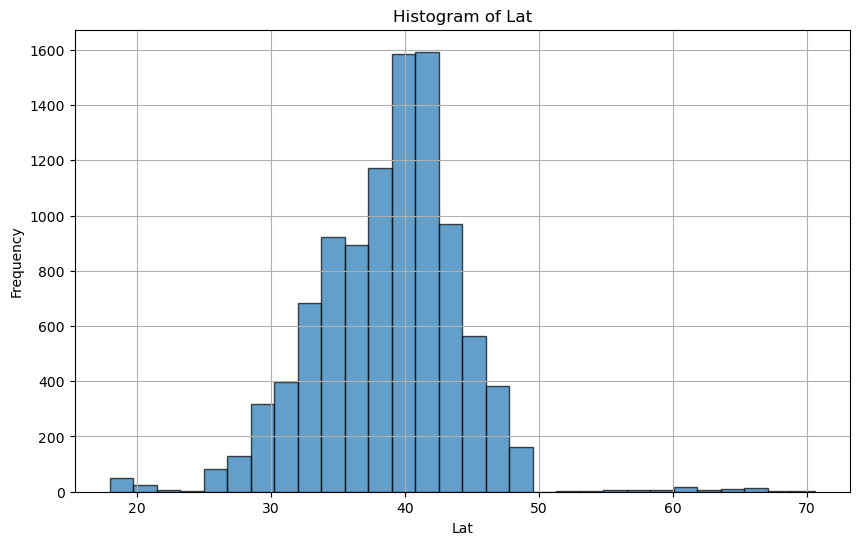

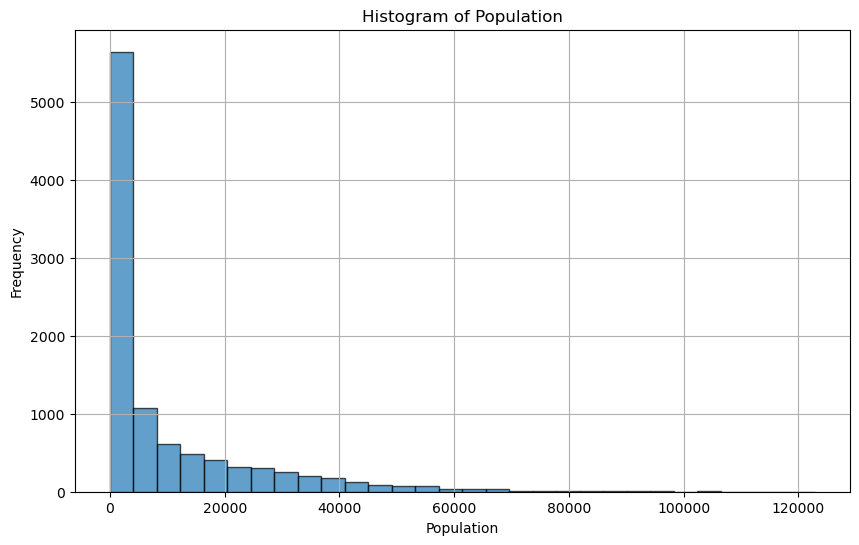

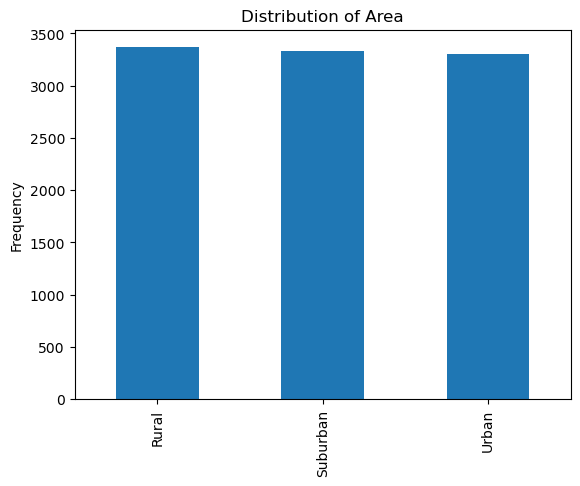

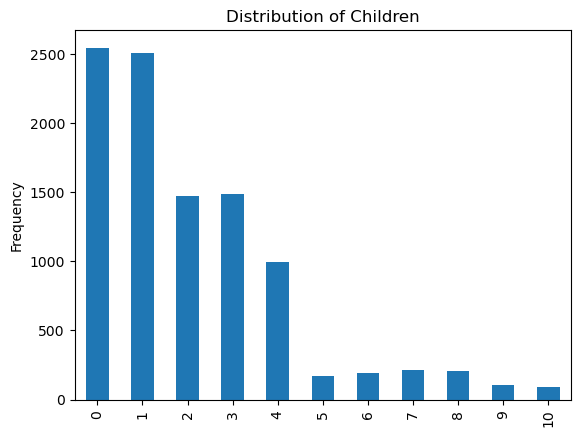

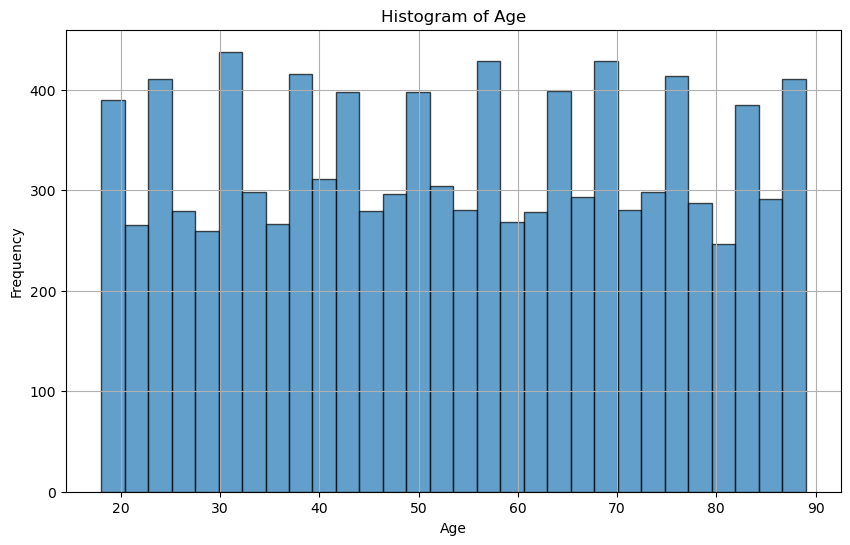

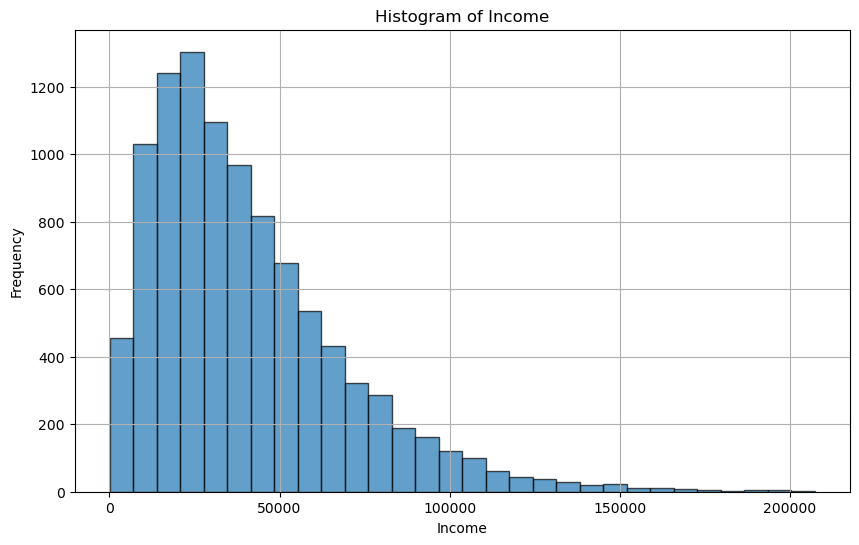

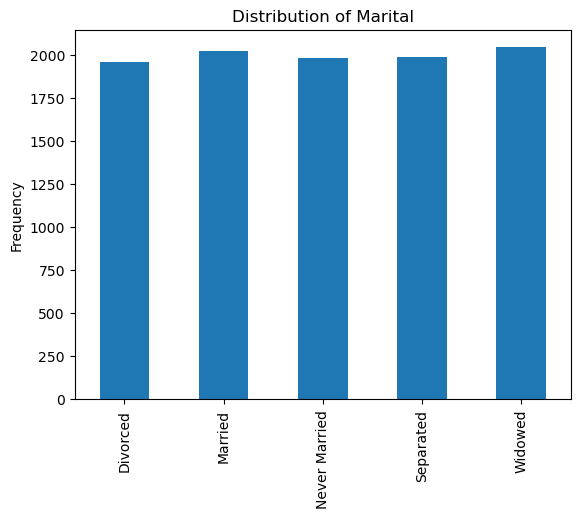

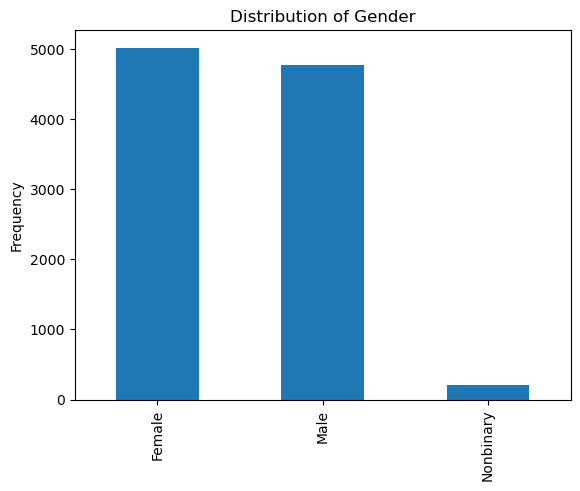

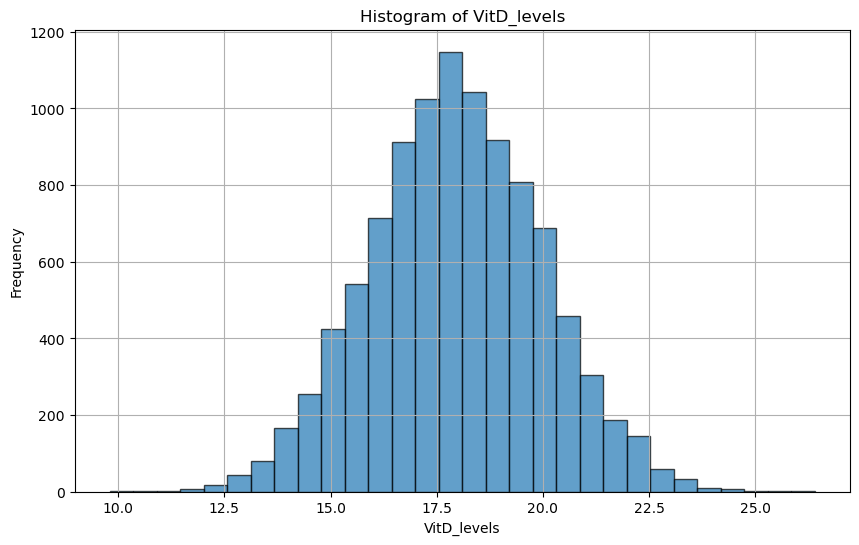

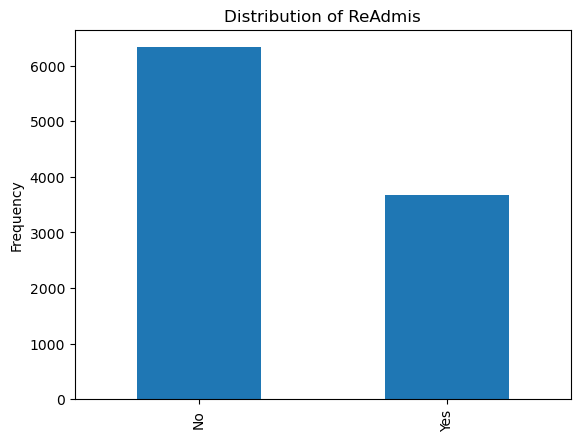

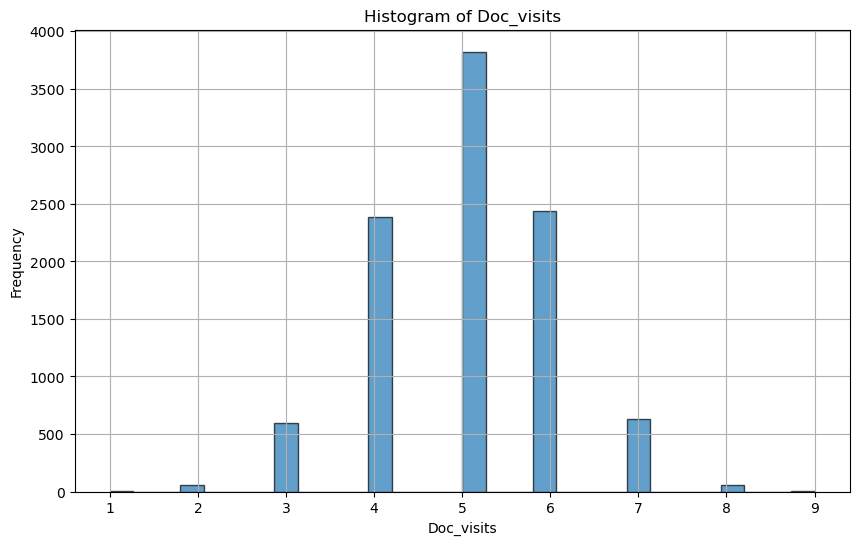

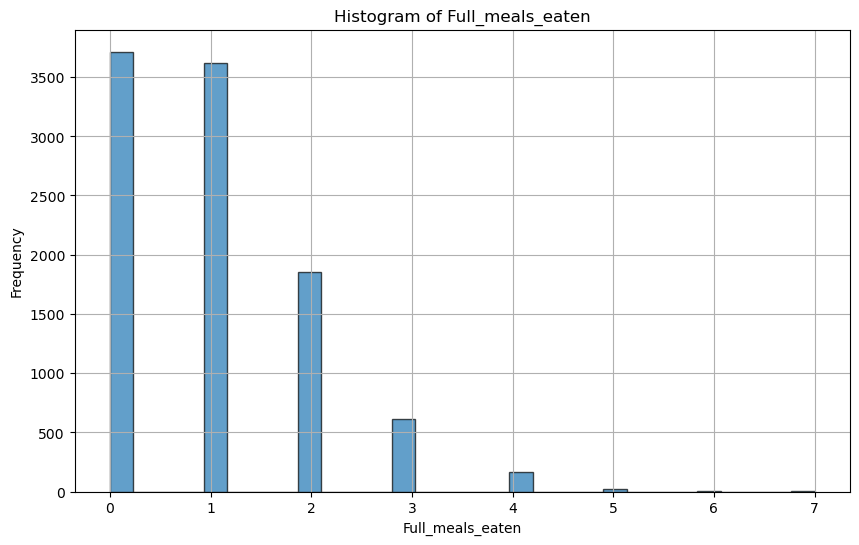

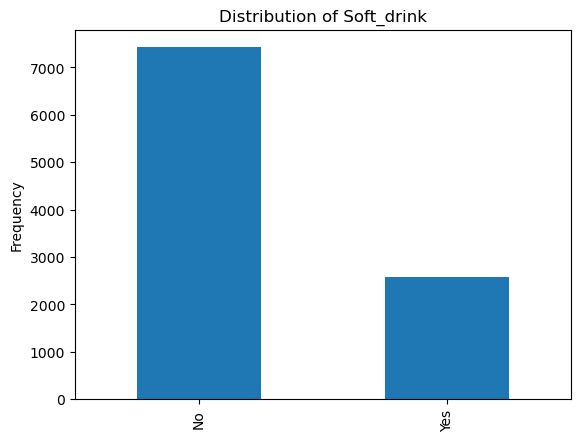

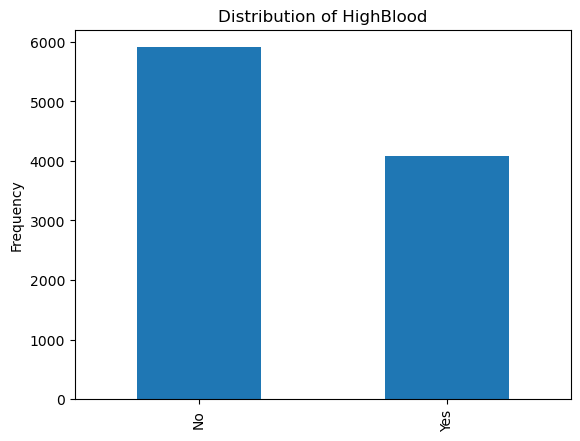

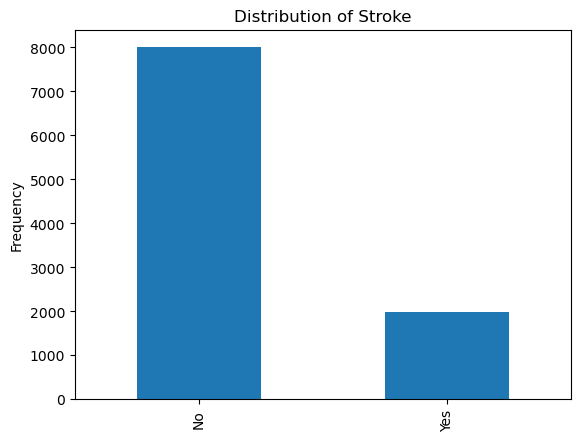

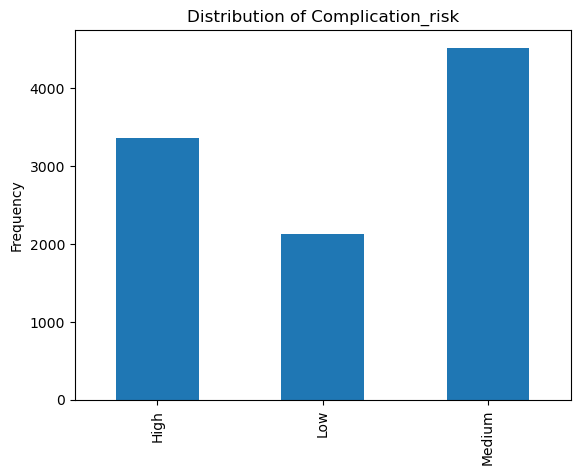

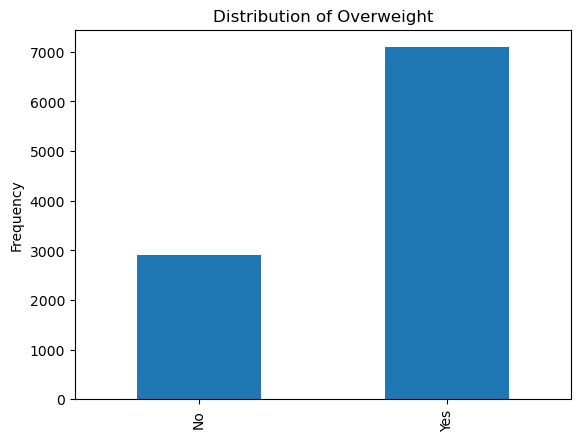

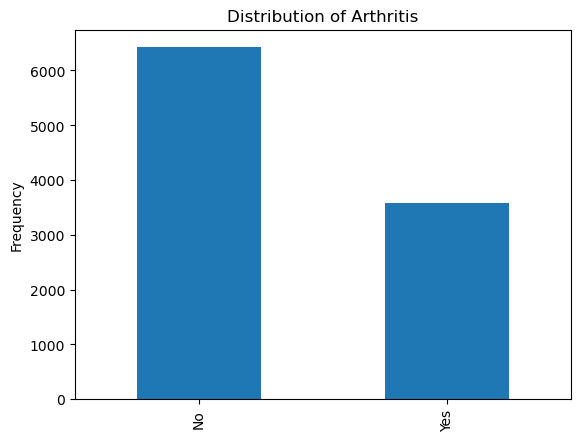

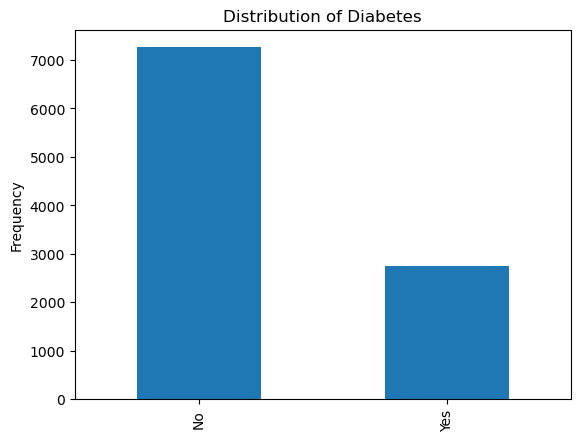

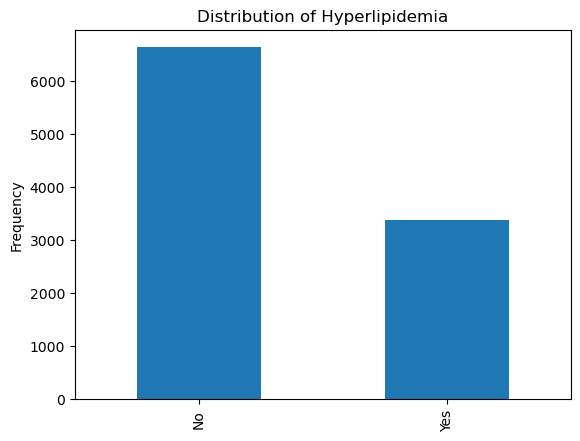

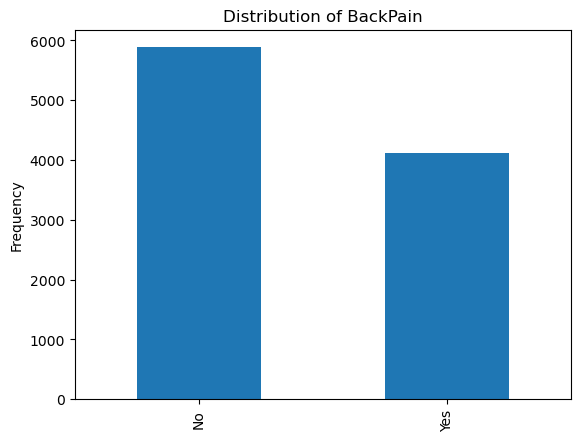

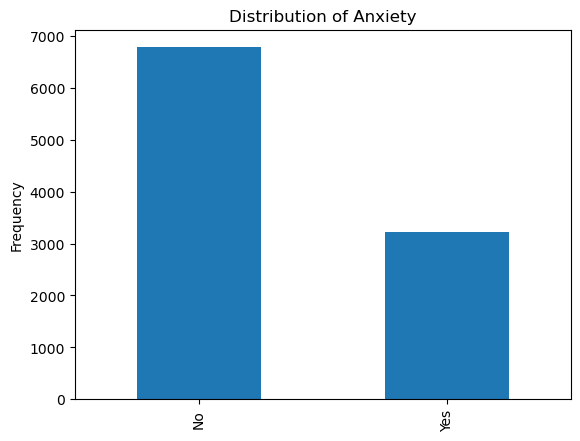

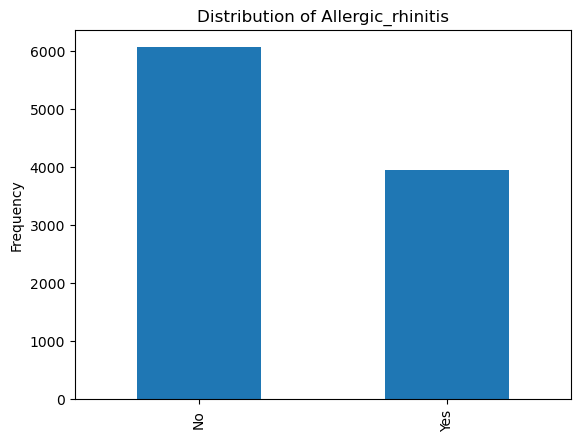

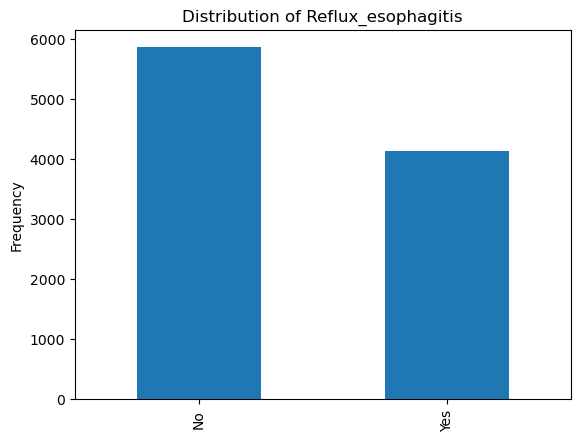

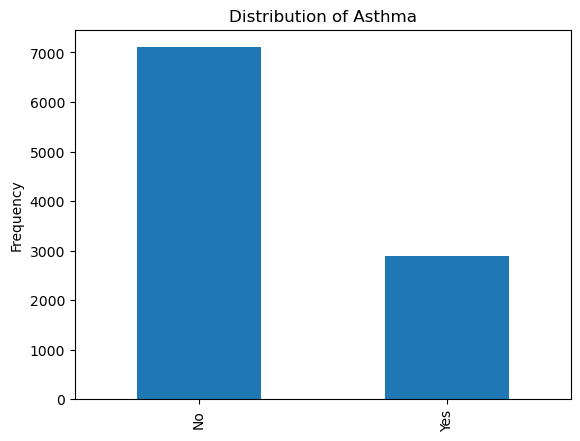

In [10]:
# Create univariate visualizations for each variable
for col in columns:
    if (df[col].dtype != 'object') & (col != 'Children'):
        plt.figure(figsize=(10, 6))
        plt.hist(df[col], bins=30, edgecolor='k', alpha=0.7)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()
    else:
        value_counts = df[col].value_counts().sort_index()
        value_counts.plot(kind='bar')
        plt.title(f'Distribution of {col}')
        plt.ylabel('Frequency')
        plt.show()

# Bivariate Visualizations

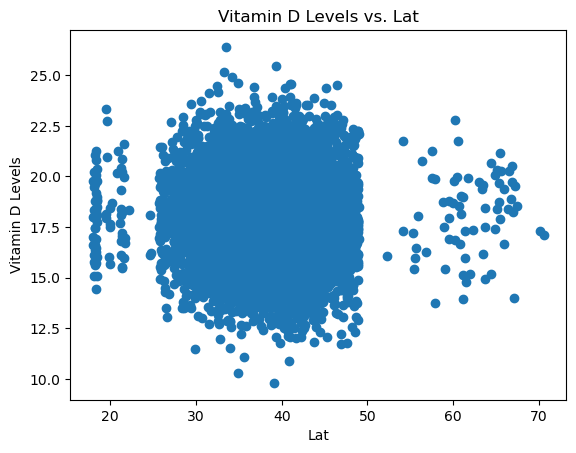

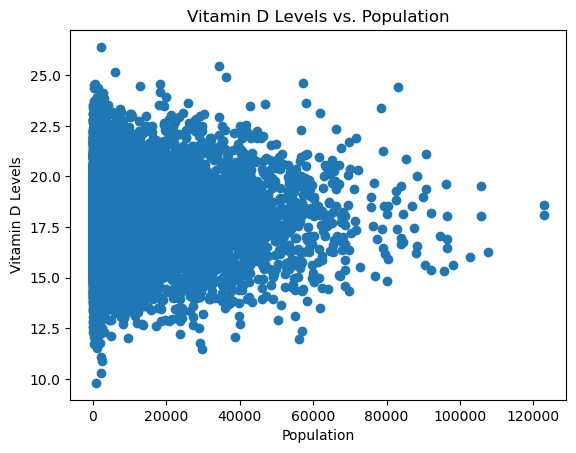

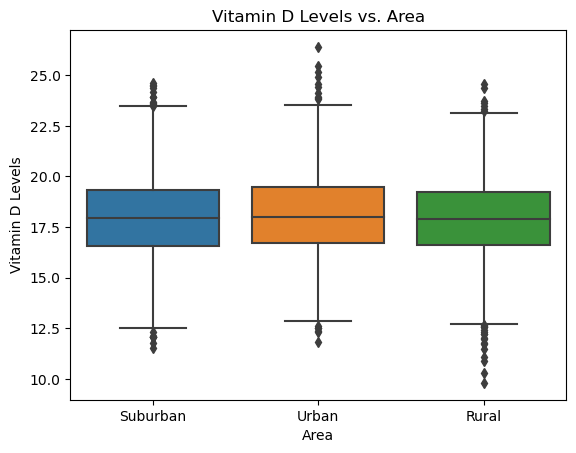

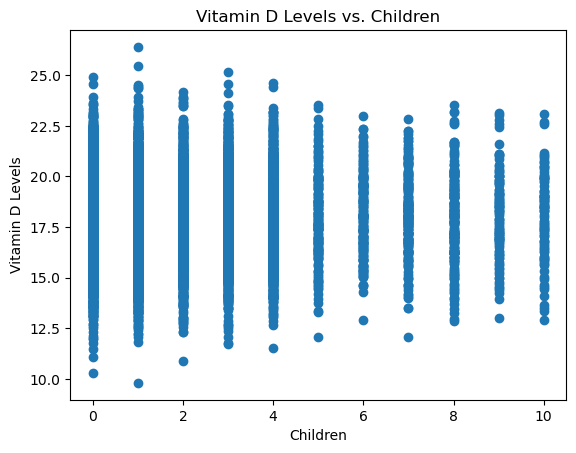

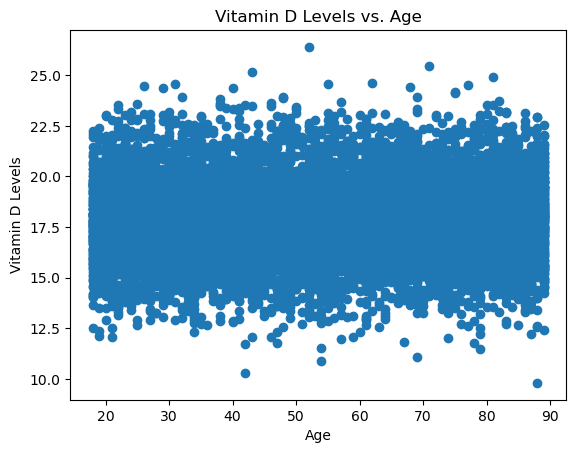

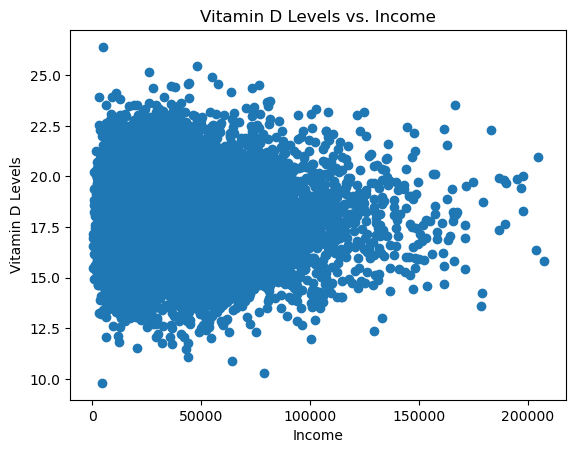

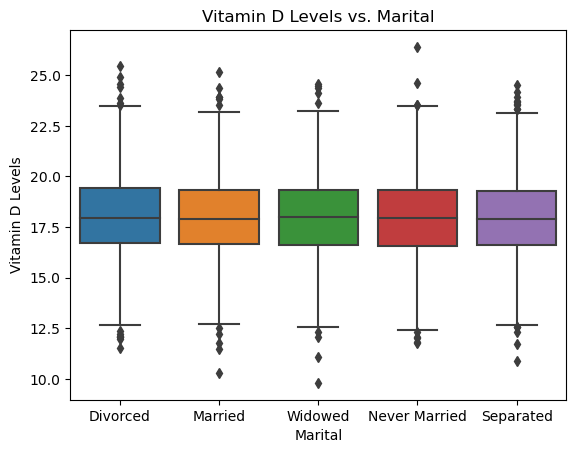

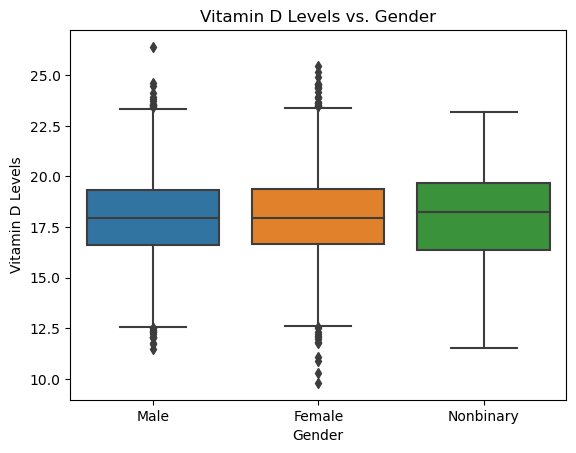

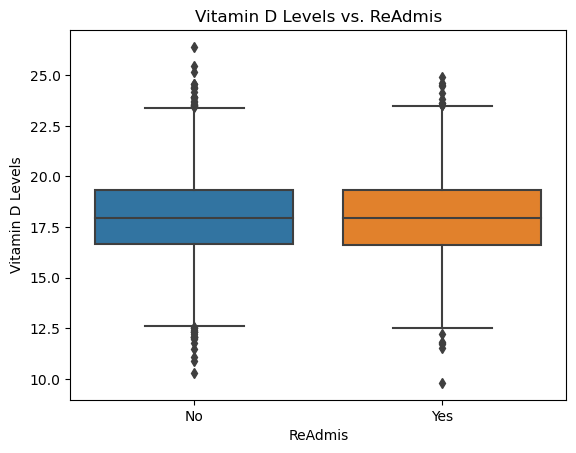

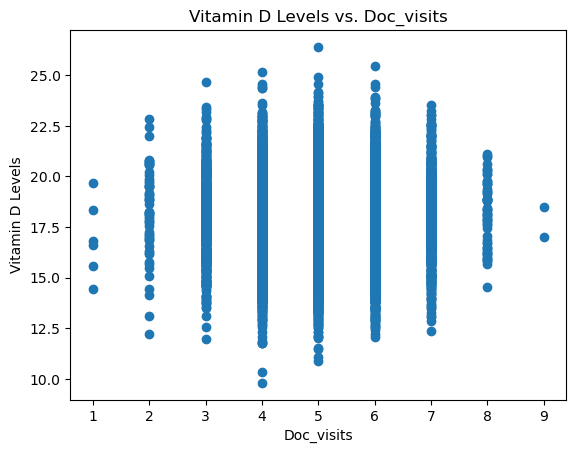

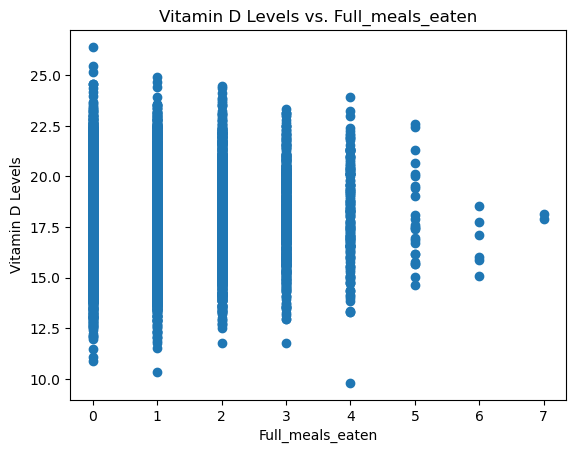

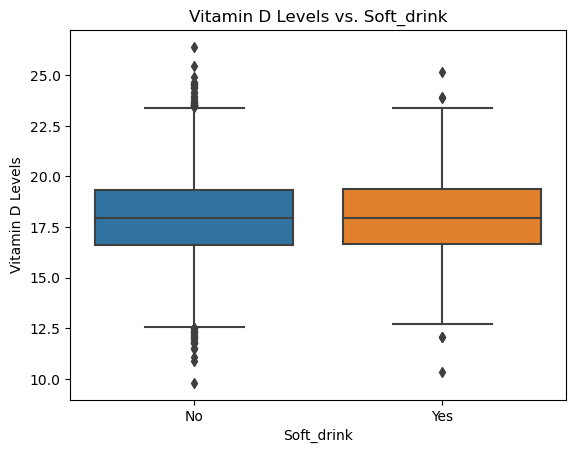

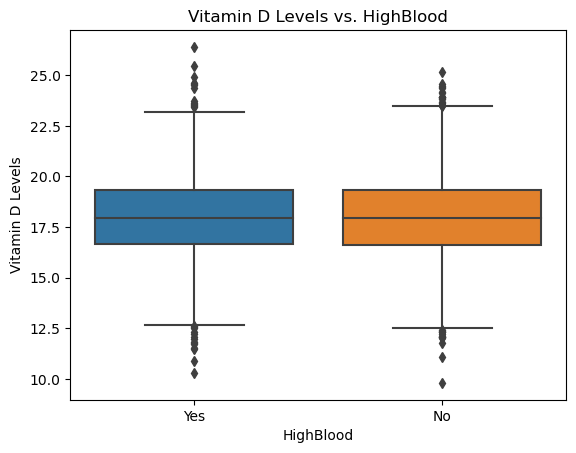

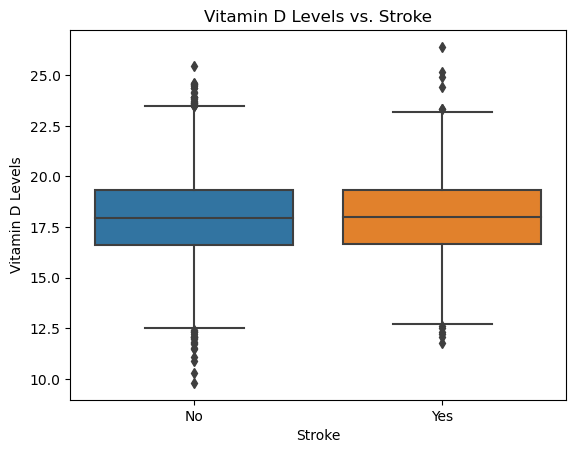

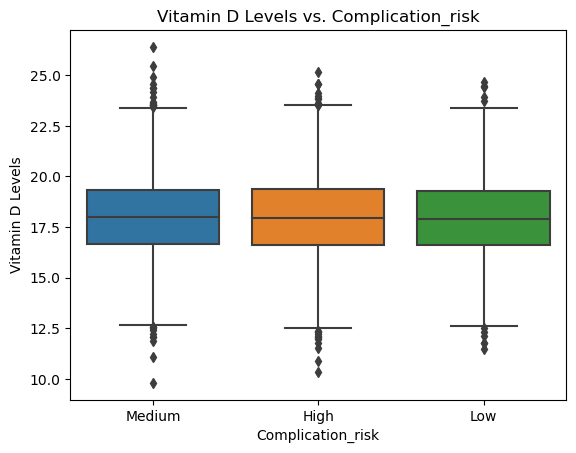

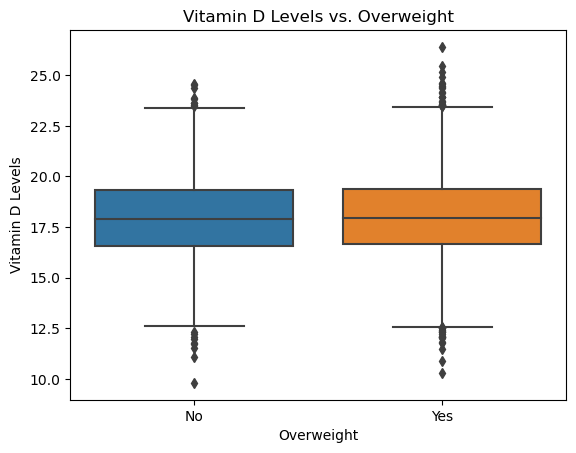

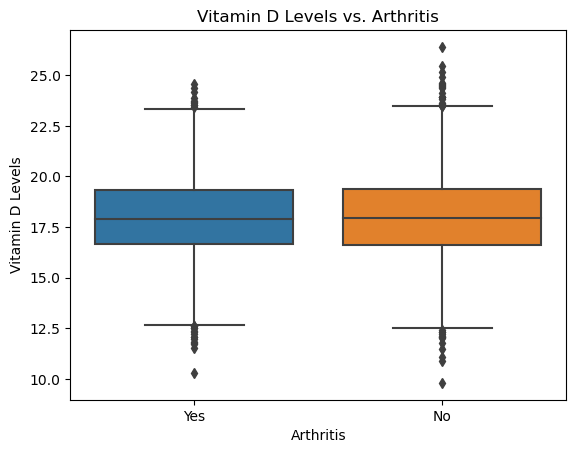

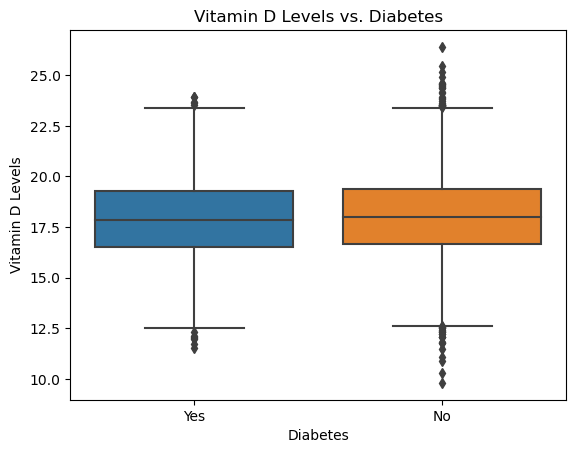

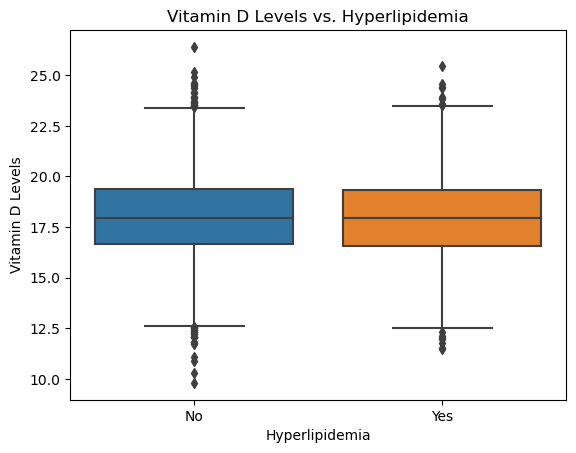

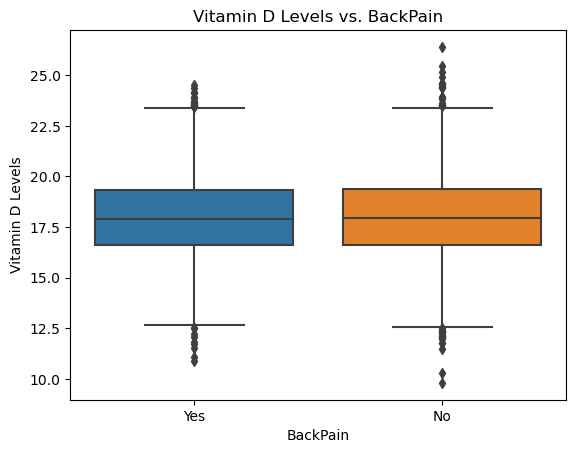

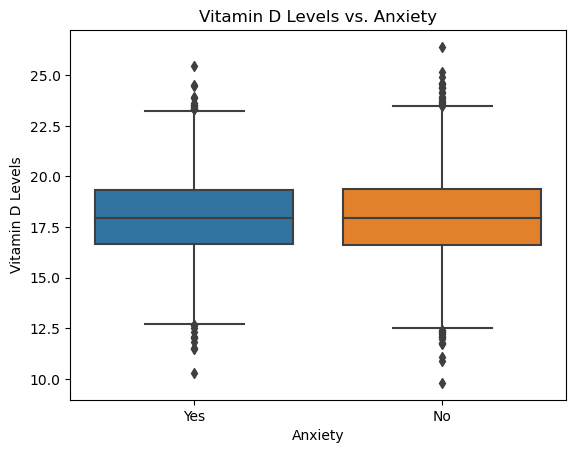

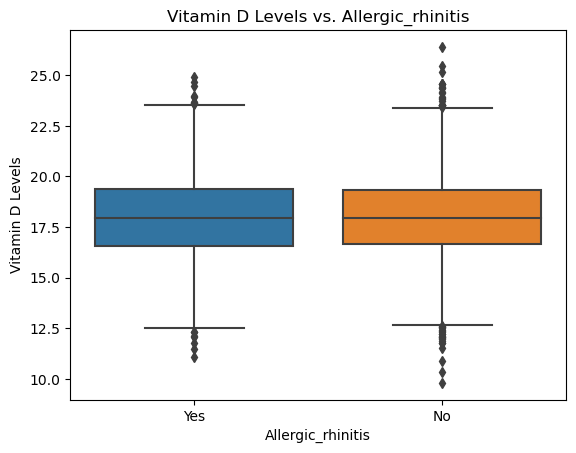

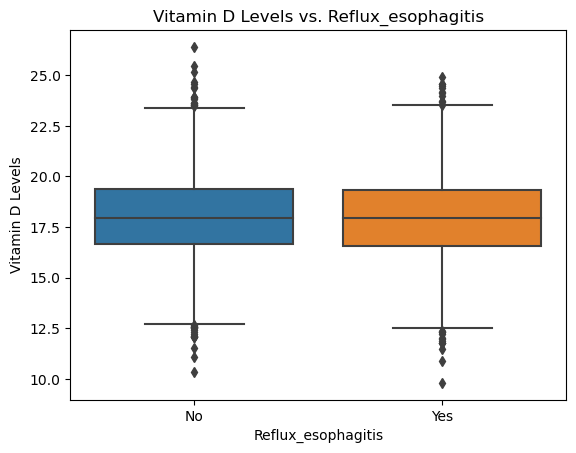

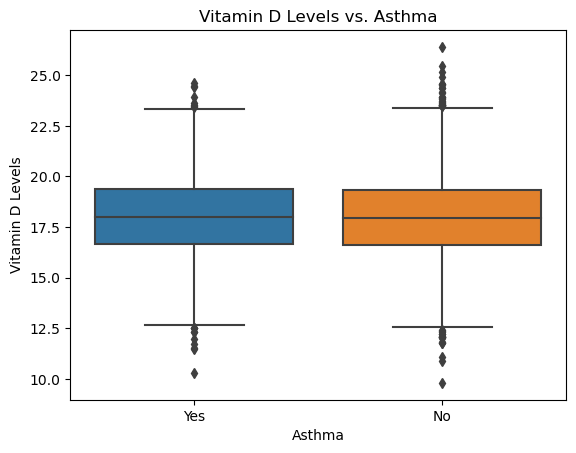

In [11]:
# Create bivariate visualizations for each dependent/independent variable combination
for col in columns:
    if col != 'VitD_levels':
        # Scatterplot if continuous vs. continuous
        if df[col].dtype != 'object':
            plt.scatter(df[col], df['VitD_levels'])
            plt.title(f'Vitamin D Levels vs. {col}')
            plt.xlabel(col)
            plt.ylabel('Vitamin D Levels')
            plt.show()
        # Boxplot if continuous vs. categorical
        else:
            sns.boxplot(x=col, y='VitD_levels', data=df)
            plt.title(f'Vitamin D Levels vs. {col}')
            plt.ylabel('Vitamin D Levels')
            plt.show()

# Encoding

In [12]:
yes_no_columns = ['ReAdmis', 'Soft_drink', 'HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 
                  'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis',
                  'Asthma']

df[yes_no_columns] = df[yes_no_columns].replace({'No': 0, 'Yes': 1})

In [13]:
df_encoded = pd.get_dummies(df, columns=['Area', 'Marital', 'Gender', 'Complication_risk'], drop_first=True)
df_encoded = df_encoded.rename(columns={'Marital_Never Married':'Marital_NeverMarried'})
df_encoded.columns

Index(['Lat', 'Population', 'Children', 'Age', 'Income', 'VitD_levels',
       'ReAdmis', 'Doc_visits', 'Full_meals_eaten', 'Soft_drink', 'HighBlood',
       'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia',
       'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis',
       'Asthma', 'Area_Suburban', 'Area_Urban', 'Marital_Married',
       'Marital_NeverMarried', 'Marital_Separated', 'Marital_Widowed',
       'Gender_Male', 'Gender_Nonbinary', 'Complication_risk_Low',
       'Complication_risk_Medium'],
      dtype='object')

# Standardize data using StandardScaler

In [14]:
# Selecting predictors for standardization (excluding the target variable 'VitD_levels')
predictors = df_encoded.columns.difference(['VitD_levels'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to your data and transform it
df_encoded_standardized = df_encoded.copy()  # Creating a copy to retain the original data
df_encoded_standardized[predictors] = scaler.fit_transform(df_encoded[predictors])

# Modeling

In [15]:
# Initial model using all predictor variables
formula = '''
VitD_levels ~ Lat + Population + Children + Age + Income + 
ReAdmis + Doc_visits + Full_meals_eaten + Soft_drink + HighBlood + Stroke + 
Overweight + Arthritis + Diabetes + Hyperlipidemia + BackPain + Anxiety + 
Allergic_rhinitis + Reflux_esophagitis + Asthma + Area_Suburban + Area_Urban + 
Marital_Married + Marital_NeverMarried + Marital_Separated + Marital_Widowed + 
Gender_Male + Gender_Nonbinary + Complication_risk_Low + Complication_risk_Medium
'''

mdl_vitd_initial = ols(formula=formula, data=df_encoded_standardized).fit()

print(mdl_vitd_initial.summary())

                            OLS Regression Results                            
Dep. Variable:            VitD_levels   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.335
Date:                Tue, 20 Feb 2024   Prob (F-statistic):              0.105
Time:                        20:26:48   Log-Likelihood:                -21186.
No. Observations:               10000   AIC:                         4.243e+04
Df Residuals:                    9969   BIC:                         4.266e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

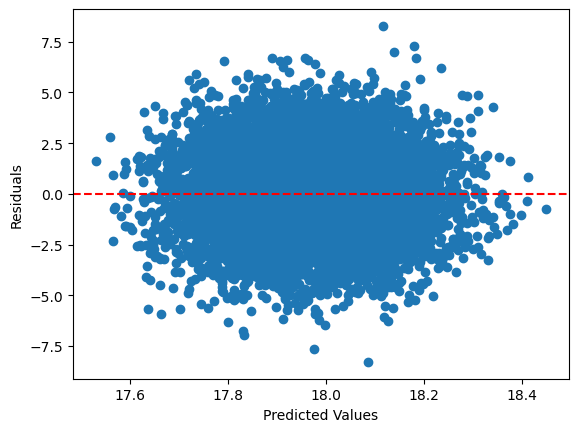

Durbin-Watson statistic: 2.0069781132123152
Breusch-Pagan p-value: 0.227589383212438


In [16]:
# Residuals vs. Predicted Values for Homoscedasticity and Linearity
residuals = mdl_vitd_initial.resid
fitted = mdl_vitd_initial.fittedvalues

plt.scatter(fitted, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Durbin-Watson Test for Independence
dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw_stat}")

# Breusch-Pagan Test for Homoscedasticity
_, bp_pvalue, _, _ = het_breuschpagan(residuals, mdl_vitd_initial.model.exog)
print(f"Breusch-Pagan p-value: {bp_pvalue}")


In [17]:
# Check for multicollinearity in initial model
X = df_encoded[[
    'Lat', 'Population', 'Children', 'Age', 'Income', 
    'ReAdmis', 'Doc_visits', 'Full_meals_eaten', 'Soft_drink', 'HighBlood', 'Stroke', 
    'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 
    'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Area_Suburban', 'Area_Urban', 
    'Marital_Married', 'Marital_NeverMarried', 'Marital_Separated', 'Marital_Widowed', 
    'Gender_Male', 'Gender_Nonbinary', 'Complication_risk_Low', 'Complication_risk_Medium'
]]

# Add a constant for VIF calculation
X = add_constant(X)

# Calculate VIF for each explanatory variable
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data


,feature,VIF
0,const,108.052439
1,Lat,1.047453
2,Population,1.048548
3,Children,1.003519
4,Age,1.003728
5,Income,1.002652
6,ReAdmis,1.003133
7,Doc_visits,1.002931
8,Full_meals_eaten,1.003491
9,Soft_drink,1.003034


In [18]:
# Remove Arthritis
formula = '''
VitD_levels ~ Lat + Population + Children + Age + Income + 
ReAdmis + Doc_visits + Full_meals_eaten + Soft_drink + HighBlood + Stroke + 
Overweight + Diabetes + Hyperlipidemia + BackPain + Anxiety + 
Allergic_rhinitis + Reflux_esophagitis + Asthma + Area_Suburban + Area_Urban + 
Marital_Married + Marital_NeverMarried + Marital_Separated + Marital_Widowed + 
Gender_Male + Gender_Nonbinary + Complication_risk_Low + Complication_risk_Medium
'''

mdl_vitd_v2 = ols(formula=formula, data=df_encoded_standardized).fit()

print(mdl_vitd_v2.summary())

                            OLS Regression Results                            
Dep. Variable:            VitD_levels   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.381
Date:                Tue, 20 Feb 2024   Prob (F-statistic):             0.0837
Time:                        20:26:48   Log-Likelihood:                -21186.
No. Observations:               10000   AIC:                         4.243e+04
Df Residuals:                    9970   BIC:                         4.265e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [19]:
# Remove Arthritis, Lat
formula = '''
VitD_levels ~ Population + Children + Age + Income + 
ReAdmis + Doc_visits + Full_meals_eaten + Soft_drink + HighBlood + Stroke + 
Overweight + Diabetes + Hyperlipidemia + BackPain + Anxiety + 
Allergic_rhinitis + Reflux_esophagitis + Asthma + Area_Suburban + Area_Urban + 
Marital_Married + Marital_NeverMarried + Marital_Separated + Marital_Widowed + 
Gender_Male + Gender_Nonbinary + Complication_risk_Low + Complication_risk_Medium
'''

mdl_vitd_v3 = ols(formula=formula, data=df_encoded_standardized).fit()

print(mdl_vitd_v3.summary())

                            OLS Regression Results                            
Dep. Variable:            VitD_levels   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.428
Date:                Tue, 20 Feb 2024   Prob (F-statistic):             0.0666
Time:                        20:26:48   Log-Likelihood:                -21186.
No. Observations:               10000   AIC:                         4.243e+04
Df Residuals:                    9971   BIC:                         4.264e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [20]:
# Remove Arthritis, Lat, Population
formula = '''
VitD_levels ~ Children + Age + Income + 
ReAdmis + Doc_visits + Full_meals_eaten + Soft_drink + HighBlood + Stroke + 
Overweight + Diabetes + Hyperlipidemia + BackPain + Anxiety + 
Allergic_rhinitis + Reflux_esophagitis + Asthma + Area_Suburban + Area_Urban + 
Marital_Married + Marital_NeverMarried + Marital_Separated + Marital_Widowed + 
Gender_Male + Gender_Nonbinary + Complication_risk_Low + Complication_risk_Medium
'''

mdl_vitd_v4 = ols(formula=formula, data=df_encoded_standardized).fit()

print(mdl_vitd_v4.summary())

                            OLS Regression Results                            
Dep. Variable:            VitD_levels   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.479
Date:                Tue, 20 Feb 2024   Prob (F-statistic):             0.0524
Time:                        20:26:49   Log-Likelihood:                -21186.
No. Observations:               10000   AIC:                         4.243e+04
Df Residuals:                    9972   BIC:                         4.263e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [21]:
# Remove Arthritis, Lat, Population, Marital_Married
formula = '''
VitD_levels ~ Children + Age + Income + 
ReAdmis + Doc_visits + Full_meals_eaten + Soft_drink + HighBlood + Stroke + 
Overweight + Diabetes + Hyperlipidemia + BackPain + Anxiety + 
Allergic_rhinitis + Reflux_esophagitis + Asthma + Area_Suburban + Area_Urban + 
Marital_NeverMarried + Marital_Separated + Marital_Widowed + 
Gender_Male + Gender_Nonbinary + Complication_risk_Low + Complication_risk_Medium
'''

mdl_vitd_v5 = ols(formula=formula, data=df_encoded_standardized).fit()

print(mdl_vitd_v5.summary())

                            OLS Regression Results                            
Dep. Variable:            VitD_levels   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.532
Date:                Tue, 20 Feb 2024   Prob (F-statistic):             0.0408
Time:                        20:26:49   Log-Likelihood:                -21186.
No. Observations:               10000   AIC:                         4.243e+04
Df Residuals:                    9973   BIC:                         4.262e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [22]:
# Remove Arthritis, Lat, Population, Marital_Married, Marital_Separated
formula = '''
VitD_levels ~ Children + Age + Income + 
ReAdmis + Doc_visits + Full_meals_eaten + Soft_drink + HighBlood + Stroke + 
Overweight + Diabetes + Hyperlipidemia + BackPain + Anxiety + 
Allergic_rhinitis + Reflux_esophagitis + Asthma + Area_Suburban + Area_Urban + 
Marital_NeverMarried + Marital_Widowed + 
Gender_Male + Gender_Nonbinary + Complication_risk_Low + Complication_risk_Medium
'''

mdl_vitd_v6 = ols(formula=formula, data=df_encoded_standardized).fit()

print(mdl_vitd_v6.summary())

                            OLS Regression Results                            
Dep. Variable:            VitD_levels   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.591
Date:                Tue, 20 Feb 2024   Prob (F-statistic):             0.0309
Time:                        20:26:49   Log-Likelihood:                -21186.
No. Observations:               10000   AIC:                         4.242e+04
Df Residuals:                    9974   BIC:                         4.261e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [23]:
# Remove Arthritis, Lat, Population, Marital_Married, Marital_Separated, HighBlood
formula = '''
VitD_levels ~ Children + Age + Income + 
ReAdmis + Doc_visits + Full_meals_eaten + Soft_drink + Stroke + 
Overweight + Diabetes + Hyperlipidemia + BackPain + Anxiety + 
Allergic_rhinitis + Reflux_esophagitis + Asthma + Area_Suburban + Area_Urban + 
Marital_NeverMarried + Marital_Widowed + 
Gender_Male + Gender_Nonbinary + Complication_risk_Low + Complication_risk_Medium
'''

mdl_vitd_v7 = ols(formula=formula, data=df_encoded_standardized).fit()

print(mdl_vitd_v7.summary())

                            OLS Regression Results                            
Dep. Variable:            VitD_levels   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.652
Date:                Tue, 20 Feb 2024   Prob (F-statistic):             0.0235
Time:                        20:26:49   Log-Likelihood:                -21186.
No. Observations:               10000   AIC:                         4.242e+04
Df Residuals:                    9975   BIC:                         4.260e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [24]:
# Remove Arthritis, Lat, Population, Marital_Married, Marital_Separated, HighBlood, ReAdmis
formula = '''
VitD_levels ~ Children + Age + Income + 
Doc_visits + Full_meals_eaten + Soft_drink + Stroke + 
Overweight + Diabetes + Hyperlipidemia + BackPain + Anxiety + 
Allergic_rhinitis + Reflux_esophagitis + Asthma + Area_Suburban + Area_Urban + 
Marital_NeverMarried + Marital_Widowed + 
Gender_Male + Gender_Nonbinary + Complication_risk_Low + Complication_risk_Medium
'''

mdl_vitd_v8 = ols(formula=formula, data=df_encoded_standardized).fit()

print(mdl_vitd_v8.summary())

                            OLS Regression Results                            
Dep. Variable:            VitD_levels   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.717
Date:                Tue, 20 Feb 2024   Prob (F-statistic):             0.0177
Time:                        20:26:49   Log-Likelihood:                -21186.
No. Observations:               10000   AIC:                         4.242e+04
Df Residuals:                    9976   BIC:                         4.259e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [25]:
# Remove Arthritis, Lat, Population, Marital_Married, Marital_Separated, HighBlood, ReAdmis, Soft_drink
formula = '''
VitD_levels ~ Children + Age + Income + 
Doc_visits + Full_meals_eaten + Stroke + 
Overweight + Diabetes + Hyperlipidemia + BackPain + Anxiety + 
Allergic_rhinitis + Reflux_esophagitis + Asthma + Area_Suburban + Area_Urban + 
Marital_NeverMarried + Marital_Widowed + 
Gender_Male + Gender_Nonbinary + Complication_risk_Low + Complication_risk_Medium
'''

mdl_vitd_v9 = ols(formula=formula, data=df_encoded_standardized).fit()

print(mdl_vitd_v9.summary())

                            OLS Regression Results                            
Dep. Variable:            VitD_levels   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.787
Date:                Tue, 20 Feb 2024   Prob (F-statistic):             0.0131
Time:                        20:26:49   Log-Likelihood:                -21186.
No. Observations:               10000   AIC:                         4.242e+04
Df Residuals:                    9977   BIC:                         4.258e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [26]:
# Remove Arthritis, Lat, Population, Marital_Married, Marital_Separated, HighBlood, ReAdmis, Soft_drink,
# Complication_risk_Low, 
formula = '''
VitD_levels ~ Children + Age + Income + 
Doc_visits + Full_meals_eaten + Stroke + 
Overweight + Diabetes + Hyperlipidemia + BackPain + Anxiety + 
Allergic_rhinitis + Reflux_esophagitis + Asthma + Area_Suburban + Area_Urban + 
Marital_NeverMarried + Marital_Widowed + 
Gender_Male + Gender_Nonbinary + Complication_risk_Medium
'''

mdl_vitd_v10 = ols(formula=formula, data=df_encoded_standardized).fit()

print(mdl_vitd_v10.summary())

                            OLS Regression Results                            
Dep. Variable:            VitD_levels   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.862
Date:                Tue, 20 Feb 2024   Prob (F-statistic):            0.00964
Time:                        20:26:49   Log-Likelihood:                -21187.
No. Observations:               10000   AIC:                         4.242e+04
Df Residuals:                    9978   BIC:                         4.258e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [27]:
# Remove Arthritis, Lat, Population, Marital_Married, Marital_Separated, HighBlood, ReAdmis, Soft_drink,
# Complication_risk_Low, Asthma
formula = '''
VitD_levels ~ Children + Age + Income + 
Doc_visits + Full_meals_eaten + Stroke + 
Overweight + Diabetes + Hyperlipidemia + BackPain + Anxiety + 
Allergic_rhinitis + Reflux_esophagitis + Area_Suburban + Area_Urban + 
Marital_NeverMarried + Marital_Widowed + 
Gender_Male + Gender_Nonbinary + Complication_risk_Medium
'''

mdl_vitd_v11 = ols(formula=formula, data=df_encoded_standardized).fit()

print(mdl_vitd_v11.summary())

                            OLS Regression Results                            
Dep. Variable:            VitD_levels   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.943
Date:                Tue, 20 Feb 2024   Prob (F-statistic):            0.00703
Time:                        20:26:49   Log-Likelihood:                -21187.
No. Observations:               10000   AIC:                         4.242e+04
Df Residuals:                    9979   BIC:                         4.257e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [28]:
# Remove Arthritis, Lat, Population, Marital_Married, Marital_Separated, HighBlood, ReAdmis, Soft_drink,
# Complication_risk_Low, Asthma, Marital_Widowed
formula = '''
VitD_levels ~ Children + Age + Income + 
Doc_visits + Full_meals_eaten + Stroke + 
Overweight + Diabetes + Hyperlipidemia + BackPain + Anxiety + 
Allergic_rhinitis + Reflux_esophagitis + Area_Suburban + Area_Urban + 
Marital_NeverMarried + 
Gender_Male + Gender_Nonbinary + Complication_risk_Medium
'''

mdl_vitd_v12 = ols(formula=formula, data=df_encoded_standardized).fit()

print(mdl_vitd_v12.summary())

                            OLS Regression Results                            
Dep. Variable:            VitD_levels   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.031
Date:                Tue, 20 Feb 2024   Prob (F-statistic):            0.00505
Time:                        20:26:49   Log-Likelihood:                -21187.
No. Observations:               10000   AIC:                         4.241e+04
Df Residuals:                    9980   BIC:                         4.256e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [29]:
# Remove Arthritis, Lat, Population, Marital_Married, Marital_Separated, HighBlood, ReAdmis, Soft_drink,
# Complication_risk_Low, Asthma, Marital_Widowed, Marital_NeverMarried
formula = '''
VitD_levels ~ Children + Age + Income + 
Doc_visits + Full_meals_eaten + Stroke + 
Overweight + Diabetes + Hyperlipidemia + BackPain + Anxiety + 
Allergic_rhinitis + Reflux_esophagitis + Area_Suburban + Area_Urban + 
Gender_Male + Gender_Nonbinary + Complication_risk_Medium
'''

mdl_vitd_v13 = ols(formula=formula, data=df_encoded_standardized).fit()

print(mdl_vitd_v13.summary())

                            OLS Regression Results                            
Dep. Variable:            VitD_levels   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.132
Date:                Tue, 20 Feb 2024   Prob (F-statistic):            0.00350
Time:                        20:26:49   Log-Likelihood:                -21187.
No. Observations:               10000   AIC:                         4.241e+04
Df Residuals:                    9981   BIC:                         4.255e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [30]:
# Remove Arthritis, Lat, Population, Marital_Married, Marital_Separated, HighBlood, ReAdmis, Soft_drink,
# Complication_risk_Low, Asthma, Marital_Widowed, Marital_NeverMarried, Allergic_rhinitis
formula = '''
VitD_levels ~ Children + Age + Income + 
Doc_visits + Full_meals_eaten + Stroke + 
Overweight + Diabetes + Hyperlipidemia + BackPain + Anxiety + 
Reflux_esophagitis + Area_Suburban + Area_Urban + 
Gender_Male + Gender_Nonbinary + Complication_risk_Medium
'''

mdl_vitd_v14 = ols(formula=formula, data=df_encoded_standardized).fit()

print(mdl_vitd_v14.summary())

                            OLS Regression Results                            
Dep. Variable:            VitD_levels   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.237
Date:                Tue, 20 Feb 2024   Prob (F-statistic):            0.00246
Time:                        20:26:49   Log-Likelihood:                -21187.
No. Observations:               10000   AIC:                         4.241e+04
Df Residuals:                    9982   BIC:                         4.254e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [31]:
# Remove Arthritis, Lat, Population, Marital_Married, Marital_Separated, HighBlood, ReAdmis, Soft_drink,
# Complication_risk_Low, Asthma, Marital_Widowed, Marital_NeverMarried, Allergic_rhinitis, Gender_Nonbinary
formula = '''
VitD_levels ~ Children + Age + Income + 
Doc_visits + Full_meals_eaten + Stroke + 
Overweight + Diabetes + Hyperlipidemia + BackPain + Anxiety + 
Reflux_esophagitis + Area_Suburban + Area_Urban + 
Gender_Male + Complication_risk_Medium
'''

mdl_vitd_v15 = ols(formula=formula, data=df_encoded_standardized).fit()

print(mdl_vitd_v15.summary())

                            OLS Regression Results                            
Dep. Variable:            VitD_levels   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.352
Date:                Tue, 20 Feb 2024   Prob (F-statistic):            0.00173
Time:                        20:26:49   Log-Likelihood:                -21187.
No. Observations:               10000   AIC:                         4.241e+04
Df Residuals:                    9983   BIC:                         4.253e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [32]:
# Remove Arthritis, Lat, Population, Marital_Married, Marital_Separated, HighBlood, ReAdmis, Soft_drink,
# Complication_risk_Low, Asthma, Marital_Widowed, Marital_NeverMarried, Allergic_rhinitis, Gender_Nonbinary,
# Anxiety
formula = '''
VitD_levels ~ Children + Age + Income + 
Doc_visits + Full_meals_eaten + Stroke + 
Overweight + Diabetes + Hyperlipidemia + BackPain + 
Reflux_esophagitis + Area_Suburban + Area_Urban + 
Gender_Male + Complication_risk_Medium
'''

mdl_vitd_v16 = ols(formula=formula, data=df_encoded_standardized).fit()

print(mdl_vitd_v16.summary())

                            OLS Regression Results                            
Dep. Variable:            VitD_levels   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.482
Date:                Tue, 20 Feb 2024   Prob (F-statistic):            0.00119
Time:                        20:26:49   Log-Likelihood:                -21188.
No. Observations:               10000   AIC:                         4.241e+04
Df Residuals:                    9984   BIC:                         4.252e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [33]:
# Remove Arthritis, Lat, Population, Marital_Married, Marital_Separated, HighBlood, ReAdmis, Soft_drink,
# Complication_risk_Low, Asthma, Marital_Widowed, Marital_NeverMarried, Allergic_rhinitis, Gender_Nonbinary,
# Anxiety, Stroke
formula = '''
VitD_levels ~ Children + Age + Income + 
Doc_visits + Full_meals_eaten + 
Overweight + Diabetes + Hyperlipidemia + BackPain + 
Reflux_esophagitis + Area_Suburban + Area_Urban + 
Gender_Male + Complication_risk_Medium
'''

mdl_vitd_v17 = ols(formula=formula, data=df_encoded_standardized).fit()

print(mdl_vitd_v17.summary())

                            OLS Regression Results                            
Dep. Variable:            VitD_levels   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.630
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           0.000797
Time:                        20:26:49   Log-Likelihood:                -21188.
No. Observations:               10000   AIC:                         4.241e+04
Df Residuals:                    9985   BIC:                         4.251e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [34]:
# Remove Arthritis, Lat, Population, Marital_Married, Marital_Separated, HighBlood, ReAdmis, Soft_drink,
# Complication_risk_Low, Asthma, Marital_Widowed, Marital_NeverMarried, Allergic_rhinitis, Gender_Nonbinary,
# Anxiety, Stroke, BackPain
formula = '''
VitD_levels ~ Children + Age + Income + 
Doc_visits + Full_meals_eaten + 
Overweight + Diabetes + Hyperlipidemia + 
Reflux_esophagitis + Area_Suburban + Area_Urban + 
Gender_Male + Complication_risk_Medium
'''

mdl_vitd_v18 = ols(formula=formula, data=df_encoded_standardized).fit()

print(mdl_vitd_v18.summary())

                            OLS Regression Results                            
Dep. Variable:            VitD_levels   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.773
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           0.000593
Time:                        20:26:49   Log-Likelihood:                -21188.
No. Observations:               10000   AIC:                         4.240e+04
Df Residuals:                    9986   BIC:                         4.251e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [35]:
# Remove Arthritis, Lat, Population, Marital_Married, Marital_Separated, HighBlood, ReAdmis, Soft_drink,
# Complication_risk_Low, Asthma, Marital_Widowed, Marital_NeverMarried, Allergic_rhinitis, Gender_Nonbinary,
# Anxiety, Stroke, BackPain, Area_Suburban
formula = '''
VitD_levels ~ Children + Age + Income + 
Doc_visits + Full_meals_eaten + 
Overweight + Diabetes + Hyperlipidemia + 
Reflux_esophagitis + Area_Urban + 
Gender_Male + Complication_risk_Medium
'''

mdl_vitd_v19 = ols(formula=formula, data=df_encoded_standardized).fit()

print(mdl_vitd_v19.summary())

                            OLS Regression Results                            
Dep. Variable:            VitD_levels   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.934
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           0.000440
Time:                        20:26:49   Log-Likelihood:                -21189.
No. Observations:               10000   AIC:                         4.240e+04
Df Residuals:                    9987   BIC:                         4.250e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [36]:
# Remove Arthritis, Lat, Population, Marital_Married, Marital_Separated, HighBlood, ReAdmis, Soft_drink,
# Complication_risk_Low, Asthma, Marital_Widowed, Marital_NeverMarried, Allergic_rhinitis, Gender_Nonbinary,
# Anxiety, Stroke, BackPain, Area_Suburban, Overweight
formula = '''
VitD_levels ~ Children + Age + Income + 
Doc_visits + Full_meals_eaten + 
Diabetes + Hyperlipidemia + 
Reflux_esophagitis + Area_Urban + 
Gender_Male + Complication_risk_Medium
'''

mdl_vitd_v20 = ols(formula=formula, data=df_encoded_standardized).fit()

print(mdl_vitd_v20.summary())

                            OLS Regression Results                            
Dep. Variable:            VitD_levels   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.123
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           0.000322
Time:                        20:26:49   Log-Likelihood:                -21189.
No. Observations:               10000   AIC:                         4.240e+04
Df Residuals:                    9988   BIC:                         4.249e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [37]:
# Remove Arthritis, Lat, Population, Marital_Married, Marital_Separated, HighBlood, ReAdmis, Soft_drink,
# Complication_risk_Low, Asthma, Marital_Widowed, Marital_NeverMarried, Allergic_rhinitis, Gender_Nonbinary,
# Anxiety, Stroke, BackPain, Area_Suburban, Overweight, Age
formula = '''
VitD_levels ~ Children + Income + 
Doc_visits + Full_meals_eaten + 
Diabetes + Hyperlipidemia + 
Reflux_esophagitis + Area_Urban + 
Gender_Male + Complication_risk_Medium
'''

mdl_vitd_v21 = ols(formula=formula, data=df_encoded_standardized).fit()

print(mdl_vitd_v21.summary())

                            OLS Regression Results                            
Dep. Variable:            VitD_levels   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.335
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           0.000242
Time:                        20:26:49   Log-Likelihood:                -21189.
No. Observations:               10000   AIC:                         4.240e+04
Df Residuals:                    9989   BIC:                         4.248e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [38]:
# Remove Arthritis, Lat, Population, Marital_Married, Marital_Separated, HighBlood, ReAdmis, Soft_drink,
# Complication_risk_Low, Asthma, Marital_Widowed, Marital_NeverMarried, Allergic_rhinitis, Gender_Nonbinary,
# Anxiety, Stroke, BackPain, Area_Suburban, Overweight, Age, Children
formula = '''
VitD_levels ~ Income + 
Doc_visits + Full_meals_eaten + 
Diabetes + Hyperlipidemia + 
Reflux_esophagitis + Area_Urban + 
Gender_Male + Complication_risk_Medium
'''

mdl_vitd_v22 = ols(formula=formula, data=df_encoded_standardized).fit()

print(mdl_vitd_v22.summary())

                            OLS Regression Results                            
Dep. Variable:            VitD_levels   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.580
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           0.000186
Time:                        20:26:50   Log-Likelihood:                -21190.
No. Observations:               10000   AIC:                         4.240e+04
Df Residuals:                    9990   BIC:                         4.247e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [39]:
# Remove Arthritis, Lat, Population, Marital_Married, Marital_Separated, HighBlood, ReAdmis, Soft_drink,
# Complication_risk_Low, Asthma, Marital_Widowed, Marital_NeverMarried, Allergic_rhinitis, Gender_Nonbinary,
# Anxiety, Stroke, BackPain, Area_Suburban, Overweight, Age, Children, Doc_visits
formula = '''
VitD_levels ~ Income + 
Full_meals_eaten + 
Diabetes + Hyperlipidemia + 
Reflux_esophagitis + Area_Urban + 
Gender_Male + Complication_risk_Medium
'''

mdl_vitd_v23 = ols(formula=formula, data=df_encoded_standardized).fit()

print(mdl_vitd_v23.summary())

                            OLS Regression Results                            
Dep. Variable:            VitD_levels   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.885
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           0.000138
Time:                        20:26:50   Log-Likelihood:                -21191.
No. Observations:               10000   AIC:                         4.240e+04
Df Residuals:                    9991   BIC:                         4.246e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [40]:
# Remove Arthritis, Lat, Population, Marital_Married, Marital_Separated, HighBlood, ReAdmis, Soft_drink,
# Complication_risk_Low, Asthma, Marital_Widowed, Marital_NeverMarried, Allergic_rhinitis, Gender_Nonbinary,
# Anxiety, Stroke, BackPain, Area_Suburban, Overweight, Age, Children, Doc_visits, Complication_risk_Medium
formula = '''
VitD_levels ~ Income + 
Full_meals_eaten + 
Diabetes + Hyperlipidemia + 
Reflux_esophagitis + Area_Urban + 
Gender_Male
'''

mdl_vitd_v24 = ols(formula=formula, data=df_encoded_standardized).fit()

print(mdl_vitd_v24.summary())

                            OLS Regression Results                            
Dep. Variable:            VitD_levels   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     4.273
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           0.000100
Time:                        20:26:50   Log-Likelihood:                -21191.
No. Observations:               10000   AIC:                         4.240e+04
Df Residuals:                    9992   BIC:                         4.246e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             17.9643      0

In [41]:
# Remove Arthritis, Lat, Population, Marital_Married, Marital_Separated, HighBlood, ReAdmis, Soft_drink,
# Complication_risk_Low, Asthma, Marital_Widowed, Marital_NeverMarried, Allergic_rhinitis, Gender_Nonbinary,
# Anxiety, Stroke, BackPain, Area_Suburban, Overweight, Age, Children, Doc_visits, Complication_risk_Medium,
# Hyperlipidemia
formula = '''
VitD_levels ~ Income + 
Full_meals_eaten + 
Diabetes + 
Reflux_esophagitis + Area_Urban + 
Gender_Male
'''

mdl_vitd_v25 = ols(formula=formula, data=df_encoded_standardized).fit()

print(mdl_vitd_v25.summary())

                            OLS Regression Results                            
Dep. Variable:            VitD_levels   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     4.767
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           7.35e-05
Time:                        20:26:50   Log-Likelihood:                -21192.
No. Observations:               10000   AIC:                         4.240e+04
Df Residuals:                    9993   BIC:                         4.245e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             17.9643      0

In [42]:
# Remove Arthritis, Lat, Population, Marital_Married, Marital_Separated, HighBlood, ReAdmis, Soft_drink,
# Complication_risk_Low, Asthma, Marital_Widowed, Marital_NeverMarried, Allergic_rhinitis, Gender_Nonbinary,
# Anxiety, Stroke, BackPain, Area_Suburban, Overweight, Age, Children, Doc_visits, Complication_risk_Medium,
# Hyperlipidemia, Income
formula = '''
VitD_levels ~ Full_meals_eaten + 
Diabetes + 
Reflux_esophagitis + Area_Urban + 
Gender_Male
'''

mdl_vitd_v26 = ols(formula=formula, data=df_encoded_standardized).fit()

print(mdl_vitd_v26.summary())

                            OLS Regression Results                            
Dep. Variable:            VitD_levels   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     5.378
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           6.07e-05
Time:                        20:26:50   Log-Likelihood:                -21193.
No. Observations:               10000   AIC:                         4.240e+04
Df Residuals:                    9994   BIC:                         4.244e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             17.9643      0

In [43]:
# Remove Arthritis, Lat, Population, Marital_Married, Marital_Separated, HighBlood, ReAdmis, Soft_drink,
# Complication_risk_Low, Asthma, Marital_Widowed, Marital_NeverMarried, Allergic_rhinitis, Gender_Nonbinary,
# Anxiety, Stroke, BackPain, Area_Suburban, Overweight, Age, Children, Doc_visits, Complication_risk_Medium,
# Hyperlipidemia, Income, Gender_Male
formula = '''
VitD_levels ~ Full_meals_eaten + 
Diabetes + 
Reflux_esophagitis + Area_Urban
'''

mdl_vitd_v27 = ols(formula=formula, data=df_encoded_standardized).fit()

print(mdl_vitd_v27.summary())

                            OLS Regression Results                            
Dep. Variable:            VitD_levels   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     6.249
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           5.11e-05
Time:                        20:26:50   Log-Likelihood:                -21194.
No. Observations:               10000   AIC:                         4.240e+04
Df Residuals:                    9995   BIC:                         4.243e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             17.9643      0

In [44]:
# Remove Arthritis, Lat, Population, Marital_Married, Marital_Separated, HighBlood, ReAdmis, Soft_drink,
# Complication_risk_Low, Asthma, Marital_Widowed, Marital_NeverMarried, Allergic_rhinitis, Gender_Nonbinary,
# Anxiety, Stroke, BackPain, Area_Suburban, Overweight, Age, Children, Doc_visits, Complication_risk_Medium,
# Hyperlipidemia, Income, Gender_Male, Reflux_esophagitis
formula = '''
VitD_levels ~ Full_meals_eaten + 
Diabetes + 
Area_Urban
'''

mdl_vitd_reduced = ols(formula=formula, data=df_encoded_standardized).fit()

print(mdl_vitd_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:            VitD_levels   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     7.608
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           4.45e-05
Time:                        20:26:50   Log-Likelihood:                -21195.
No. Observations:               10000   AIC:                         4.240e+04
Df Residuals:                    9996   BIC:                         4.243e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           17.9643      0.020  

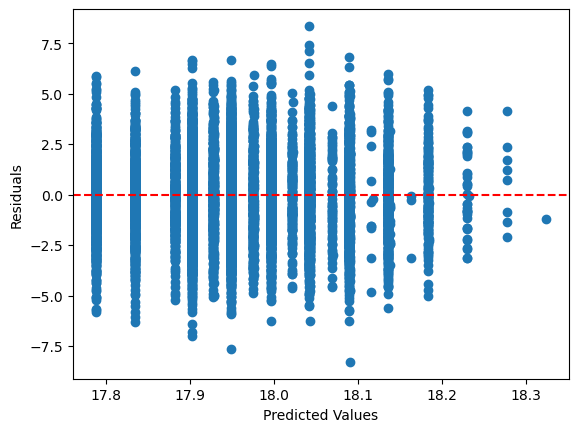

Durbin-Watson statistic: 2.0058780161758274
Breusch-Pagan p-value: 0.18042389116183924


In [45]:
# Residuals vs. Predicted Values for Homoscedasticity and Linearity
residuals = mdl_vitd_reduced.resid
fitted = mdl_vitd_reduced.fittedvalues

plt.scatter(fitted, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Durbin-Watson Test for Independence
dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw_stat}")

# Breusch-Pagan Test for Homoscedasticity
_, bp_pvalue, _, _ = het_breuschpagan(residuals, mdl_vitd_initial.model.exog)
print(f"Breusch-Pagan p-value: {bp_pvalue}")


In [46]:
# Checking for multicollinearity in reduced model
X = df_encoded[[
    'Full_meals_eaten', 'Diabetes', 'Area_Urban']]

# Add a constant for VIF calculation
X = add_constant(X)

# Calculate VIF for each explanatory variable
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data


,feature,VIF
0,const,2.868643
1,Full_meals_eaten,1.000094
2,Diabetes,1.000669
3,Area_Urban,1.000579


# Evaluate Model

In [51]:
# Remove Arthritis, Lat, Population, Marital_Married, Marital_Separated, HighBlood, ReAdmis, Soft_drink,
# Complication_risk_Low, Asthma, Marital_Widowed, Marital_NeverMarried, Allergic_rhinitis, Gender_Nonbinary,
# Anxiety, Stroke, BackPain, Area_Suburban, Overweight, Age, Children, Doc_visits, Complication_risk_Medium,
# Hyperlipidemia, Income, Gender_Male, Reflux_esophagitis
formula = '''
VitD_levels ~ Diabetes + 
Area_Urban
'''

mdl_vitd_too_far = ols(formula=formula, data=df_encoded_standardized).fit()

print(mdl_vitd_too_far.summary())

                            OLS Regression Results                            
Dep. Variable:            VitD_levels   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     8.637
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           0.000179
Time:                        20:27:56   Log-Likelihood:                -21198.
No. Observations:               10000   AIC:                         4.240e+04
Df Residuals:                    9997   BIC:                         4.242e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.9643      0.020    891.221      0.0

In [52]:
# Print F p-value for the initial model
print(f"mdl_vitd_initial F p-value: {mdl_vitd_initial.f_pvalue}")

# Loop through the numbered models
for i in range(2, 28):
    model_name = f"mdl_vitd_v{i}"
    # Use eval to get the model object by name
    model = eval(model_name)
    print(f"{model_name} F p-value: {model.f_pvalue}")

# Print F p-value for the reduced model
print(f"mdl_vitd_reduced F p-value: {mdl_vitd_reduced.f_pvalue}")
print(f"mdl_vitd_too_far F p-value: {mdl_vitd_too_far.f_pvalue}")


mdl_vitd_initial F p-value: 0.10458242600511343
mdl_vitd_v2 F p-value: 0.08366627977052134
mdl_vitd_v3 F p-value: 0.06658823807682594
mdl_vitd_v4 F p-value: 0.05241978717665789
mdl_vitd_v5 F p-value: 0.04082790320971285
mdl_vitd_v6 F p-value: 0.03093248123696729
mdl_vitd_v7 F p-value: 0.023520991627463222
mdl_vitd_v8 F p-value: 0.01766056734751539
mdl_vitd_v9 F p-value: 0.013093252021016681
mdl_vitd_v10 F p-value: 0.009643752863873986
mdl_vitd_v11 F p-value: 0.0070302408016535214
mdl_vitd_v12 F p-value: 0.005050803850463377
mdl_vitd_v13 F p-value: 0.003503898144832538
mdl_vitd_v14 F p-value: 0.002463851258839869
mdl_vitd_v15 F p-value: 0.0017279042992874895
mdl_vitd_v16 F p-value: 0.001186506720044913
mdl_vitd_v17 F p-value: 0.0007971416601718065
mdl_vitd_v18 F p-value: 0.0005931584103523736
mdl_vitd_v19 F p-value: 0.00044020622269588615
mdl_vitd_v20 F p-value: 0.00032218620992526345
mdl_vitd_v21 F p-value: 0.0002422265853790584
mdl_vitd_v22 F p-value: 0.00018559729900736373
mdl_vitd_v

In [53]:
mse = mdl_vitd_reduced.mse_resid
print(f'MSE: {mse}')
rse = np.sqrt(mse)
print(f'RSE: {rse}')

MSE: 4.061169973048643
RSE: 2.015234470985608


# Check if removing Outliers makes a difference in model

In [49]:
# # Copy the original DataFrame to preserve the original data
# df_copy = df.copy()
# print(f'Initial shape: {df.shape}')

# # Initialize a Series to keep track of rows to remove (start with all False)
# outliers_mask = pd.Series([False] * df.shape[0])

# for col in df.columns:
#     if df[col].dtype != 'object':
#         # Calculate IQR and bounds for each numeric column
#         Q1 = df[col].quantile(0.25)
#         Q3 = df[col].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
        
#         # Update the outliers mask
#         col_outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
#         outliers_mask = outliers_mask | col_outliers
        
#         # Count and display number of outliers for the column
#         num_outliers_col = col_outliers.sum()
#         print(f"{col} has {num_outliers_col} outliers")

# # Remove rows marked as outliers
# df_filtered = df[~outliers_mask]
# print(f'Shape after removing all outliers: {df_filtered.shape}')

# # If you want to remove 'Nonbinary' from 'Gender', do so after removing outliers
# print(df_filtered['Gender'].value_counts())
# df_filtered = df_filtered[df_filtered['Gender'] != 'Nonbinary']
# print(f"Shape after removing Nonbinary: {df_filtered.shape}")

# # Optional: Reset index after removal
# df_filtered.reset_index(drop=True, inplace=True)